In [2]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [3]:
from src.data.generate import generate_european_vanilla

In [4]:
n_paths = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000, 10000, 20000, 40000, 100000]
datasets_n_paths = {}

for n_path in tqdm(n_paths, desc="MC path sizes"):
    print(
        f"making synthetic data for a dataset of option prices with {n_path} of monte-carlo paths"
    )
    start = time.perf_counter()
    dataset = generate_european_vanilla(
        Option_types=["call", "put"],  # call, put
        S_values=list(np.linspace(80, 120, 8 + 1)),  # 80, 85, 90, ..., 120
        K_values=[100],  # 100
        T_values=[
            0.08,
            0.25,
            0.5,
            1.0,
            2.0,
            5.0,
        ],  # 1 month, 3 months, 6 months, 1 year, 2 years, 5 years
        r_values=[0.01, 0.025, 0.05, 0.075, 0.1],  # 1%, 2.5%, 5%, 7.5%, 10%
        sigma_values=[0.1, 0.2, 0.4, 0.6, 0.8],
        q_values=[0.0, 0.01, 0.02, 0.03, 0.04, 0.05],  # 0%, 1%, 2%, 3%, 4%, 5%
        n_paths= n_path
    )
    elapsed = time.perf_counter() - start
    datasets_n_paths[n_path] = dataset
    print(
        f"- done with making the dataset, it took {elapsed:.2f} seconds! ({n_path} of monte-carlo paths)"
    )

MC path sizes:   0%|          | 0/13 [00:00<?, ?it/s]

making synthetic data for a dataset of option prices with 10 of monte-carlo paths


MC path sizes:   8%|▊         | 1/13 [00:11<02:19, 11.64s/it]

- done with making the dataset, it took 11.64 seconds! (10 of monte-carlo paths)
making synthetic data for a dataset of option prices with 20 of monte-carlo paths


MC path sizes:  15%|█▌        | 2/13 [00:35<03:29, 19.06s/it]

- done with making the dataset, it took 24.26 seconds! (20 of monte-carlo paths)
making synthetic data for a dataset of option prices with 40 of monte-carlo paths


MC path sizes:  23%|██▎       | 3/13 [00:49<02:46, 16.63s/it]

- done with making the dataset, it took 13.73 seconds! (40 of monte-carlo paths)
making synthetic data for a dataset of option prices with 100 of monte-carlo paths


MC path sizes:  31%|███       | 4/13 [01:02<02:17, 15.25s/it]

- done with making the dataset, it took 13.13 seconds! (100 of monte-carlo paths)
making synthetic data for a dataset of option prices with 200 of monte-carlo paths


MC path sizes:  38%|███▊      | 5/13 [01:15<01:56, 14.51s/it]

- done with making the dataset, it took 13.18 seconds! (200 of monte-carlo paths)
making synthetic data for a dataset of option prices with 400 of monte-carlo paths


MC path sizes:  46%|████▌     | 6/13 [01:28<01:36, 13.75s/it]

- done with making the dataset, it took 12.28 seconds! (400 of monte-carlo paths)
making synthetic data for a dataset of option prices with 1000 of monte-carlo paths


MC path sizes:  54%|█████▍    | 7/13 [01:40<01:20, 13.36s/it]

- done with making the dataset, it took 12.56 seconds! (1000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 2000 of monte-carlo paths


MC path sizes:  62%|██████▏   | 8/13 [01:55<01:08, 13.78s/it]

- done with making the dataset, it took 14.68 seconds! (2000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 4000 of monte-carlo paths


MC path sizes:  69%|██████▉   | 9/13 [02:11<00:58, 14.57s/it]

- done with making the dataset, it took 16.29 seconds! (4000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 10000 of monte-carlo paths


MC path sizes:  77%|███████▋  | 10/13 [02:23<00:41, 13.71s/it]

- done with making the dataset, it took 11.80 seconds! (10000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 20000 of monte-carlo paths


MC path sizes:  85%|████████▍ | 11/13 [02:34<00:25, 12.88s/it]

- done with making the dataset, it took 10.98 seconds! (20000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 40000 of monte-carlo paths


MC path sizes:  92%|█████████▏| 12/13 [02:54<00:15, 15.11s/it]

- done with making the dataset, it took 20.21 seconds! (40000 of monte-carlo paths)
making synthetic data for a dataset of option prices with 100000 of monte-carlo paths


MC path sizes: 100%|██████████| 13/13 [03:16<00:00, 15.12s/it]

- done with making the dataset, it took 21.76 seconds! (100000 of monte-carlo paths)


In [5]:
Error_Values = {}
Error_Stats = {}
for n_path in n_paths:
    dataset = datasets_n_paths[n_path]
    error = dataset["bs_price"] - dataset["mc_price"]
    abs_error = abs(error)
    
    mean_error = error.mean() 
    std_error = error.std()
    
    mean_abs_error = abs_error.mean()
    std_abs_error = abs_error.std()
    
    Error_Values[n_path] = error
    Error_Stats[n_path] = {
        "number of paths": n_path,
        "one over sqrt of number of paths": (1 / np.sqrt(n_path)),
        "mean of error": mean_error,
        "standard deviation of error": std_error,
        "mean of absolute error": mean_abs_error,
        "standard deviation of absolute error": std_abs_error,
    }

In [6]:
Error_Stats = pd.DataFrame(Error_Stats).transpose().reset_index().drop(columns="index")
Error_Stats

,number of paths,one over sqrt of number of paths,mean of error,standard deviation of error,mean of absolute error,standard deviation of absolute error
0,10.0,0.316228,0.003720,18.158777,6.636390,16.902568
1,20.0,0.223607,-0.135839,41.598535,5.079804,41.287414
2,40.0,0.158114,-0.082010,11.804398,3.593068,11.244537
3,100.0,0.100000,0.055713,6.286986,2.323105,5.842272
4,200.0,0.070711,0.019557,4.415960,1.666851,4.089318
5,400.0,0.050000,-0.000545,3.177776,1.187303,2.947624
6,1000.0,0.031623,-0.002976,2.079157,0.758653,1.935798
7,2000.0,0.022361,0.004341,1.552229,0.549065,1.451875
8,4000.0,0.015811,-0.000311,1.043950,0.380371,0.972183
9,10000.0,0.010000,0.003615,0.674767,0.248048,0.627529


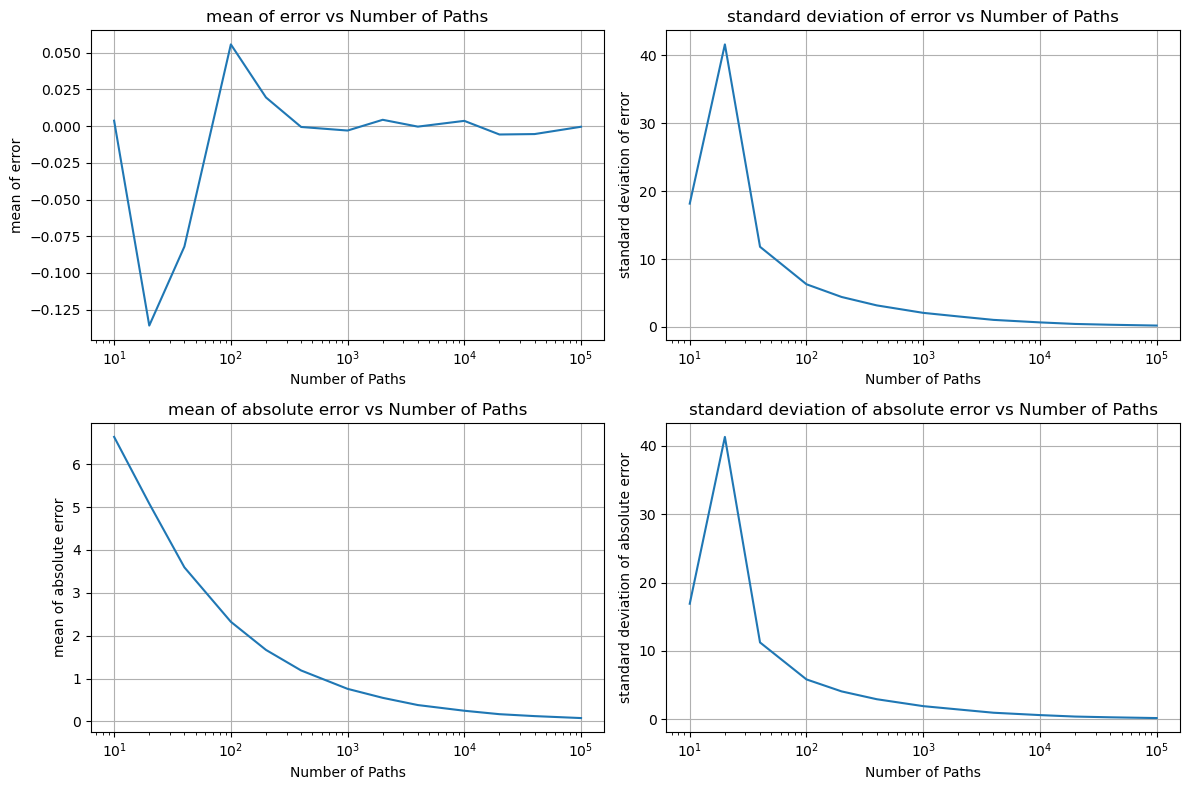

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
metrics = [
    "mean of error",
    "standard deviation of error",
    "mean of absolute error",
    "standard deviation of absolute error",
]
axes = axes.flatten()

# Plot each metric in its subplot
for ax, metric in zip(axes, metrics):
    ax.plot(Error_Stats["number of paths"], Error_Stats[metric])
    ax.set_xscale("log")
    ax.set_title(f"{metric} vs Number of Paths")
    ax.set_xlabel("Number of Paths")
    ax.set_ylabel(metric)
    ax.grid(True)

plt.tight_layout()
plt.show()

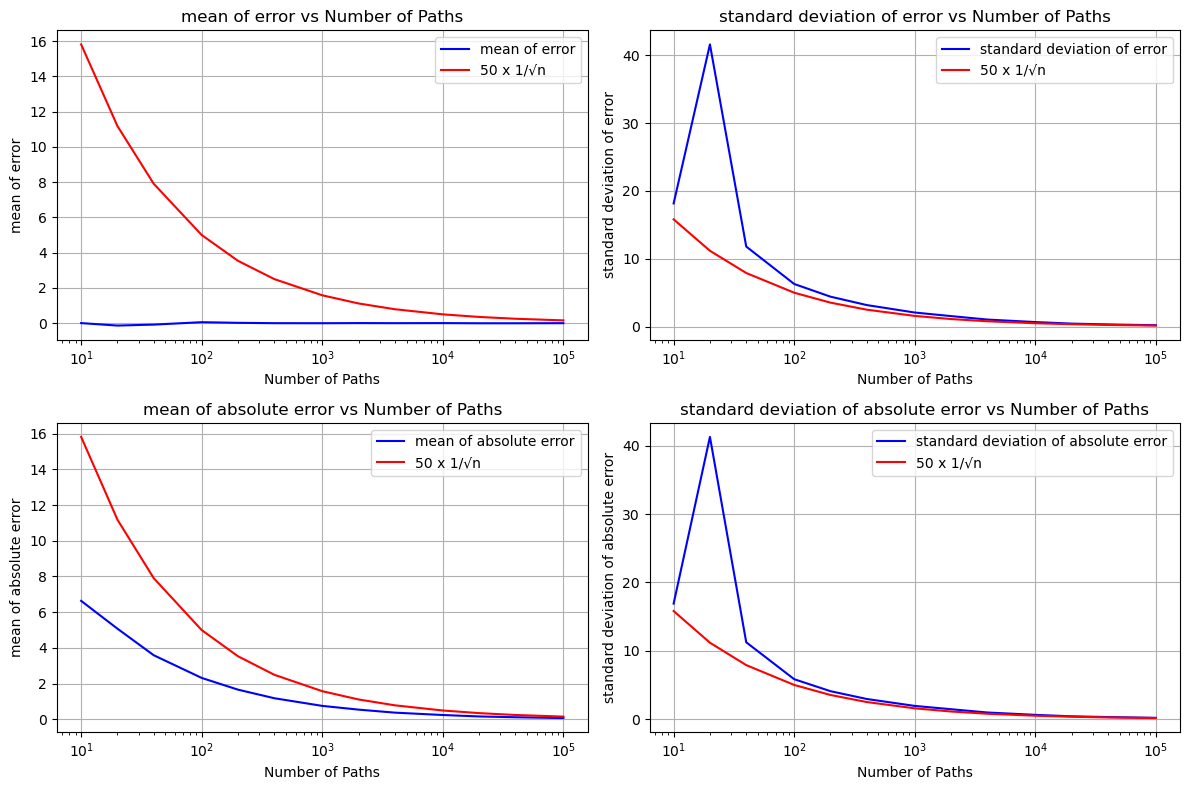

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot each metric and 1/sqrt(n) in its subplot
for ax, metric in zip(axes, metrics):
    ax.plot(Error_Stats["number of paths"], Error_Stats[metric], color="blue", label=metric)
    ax.plot(Error_Stats["number of paths"], Error_Stats["one over sqrt of number of paths"]*50, color="red", label="50 x 1/√n")
    ax.set_xscale("log")
    ax.set_title(f"{metric} vs Number of Paths")
    ax.set_xlabel("Number of Paths")
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

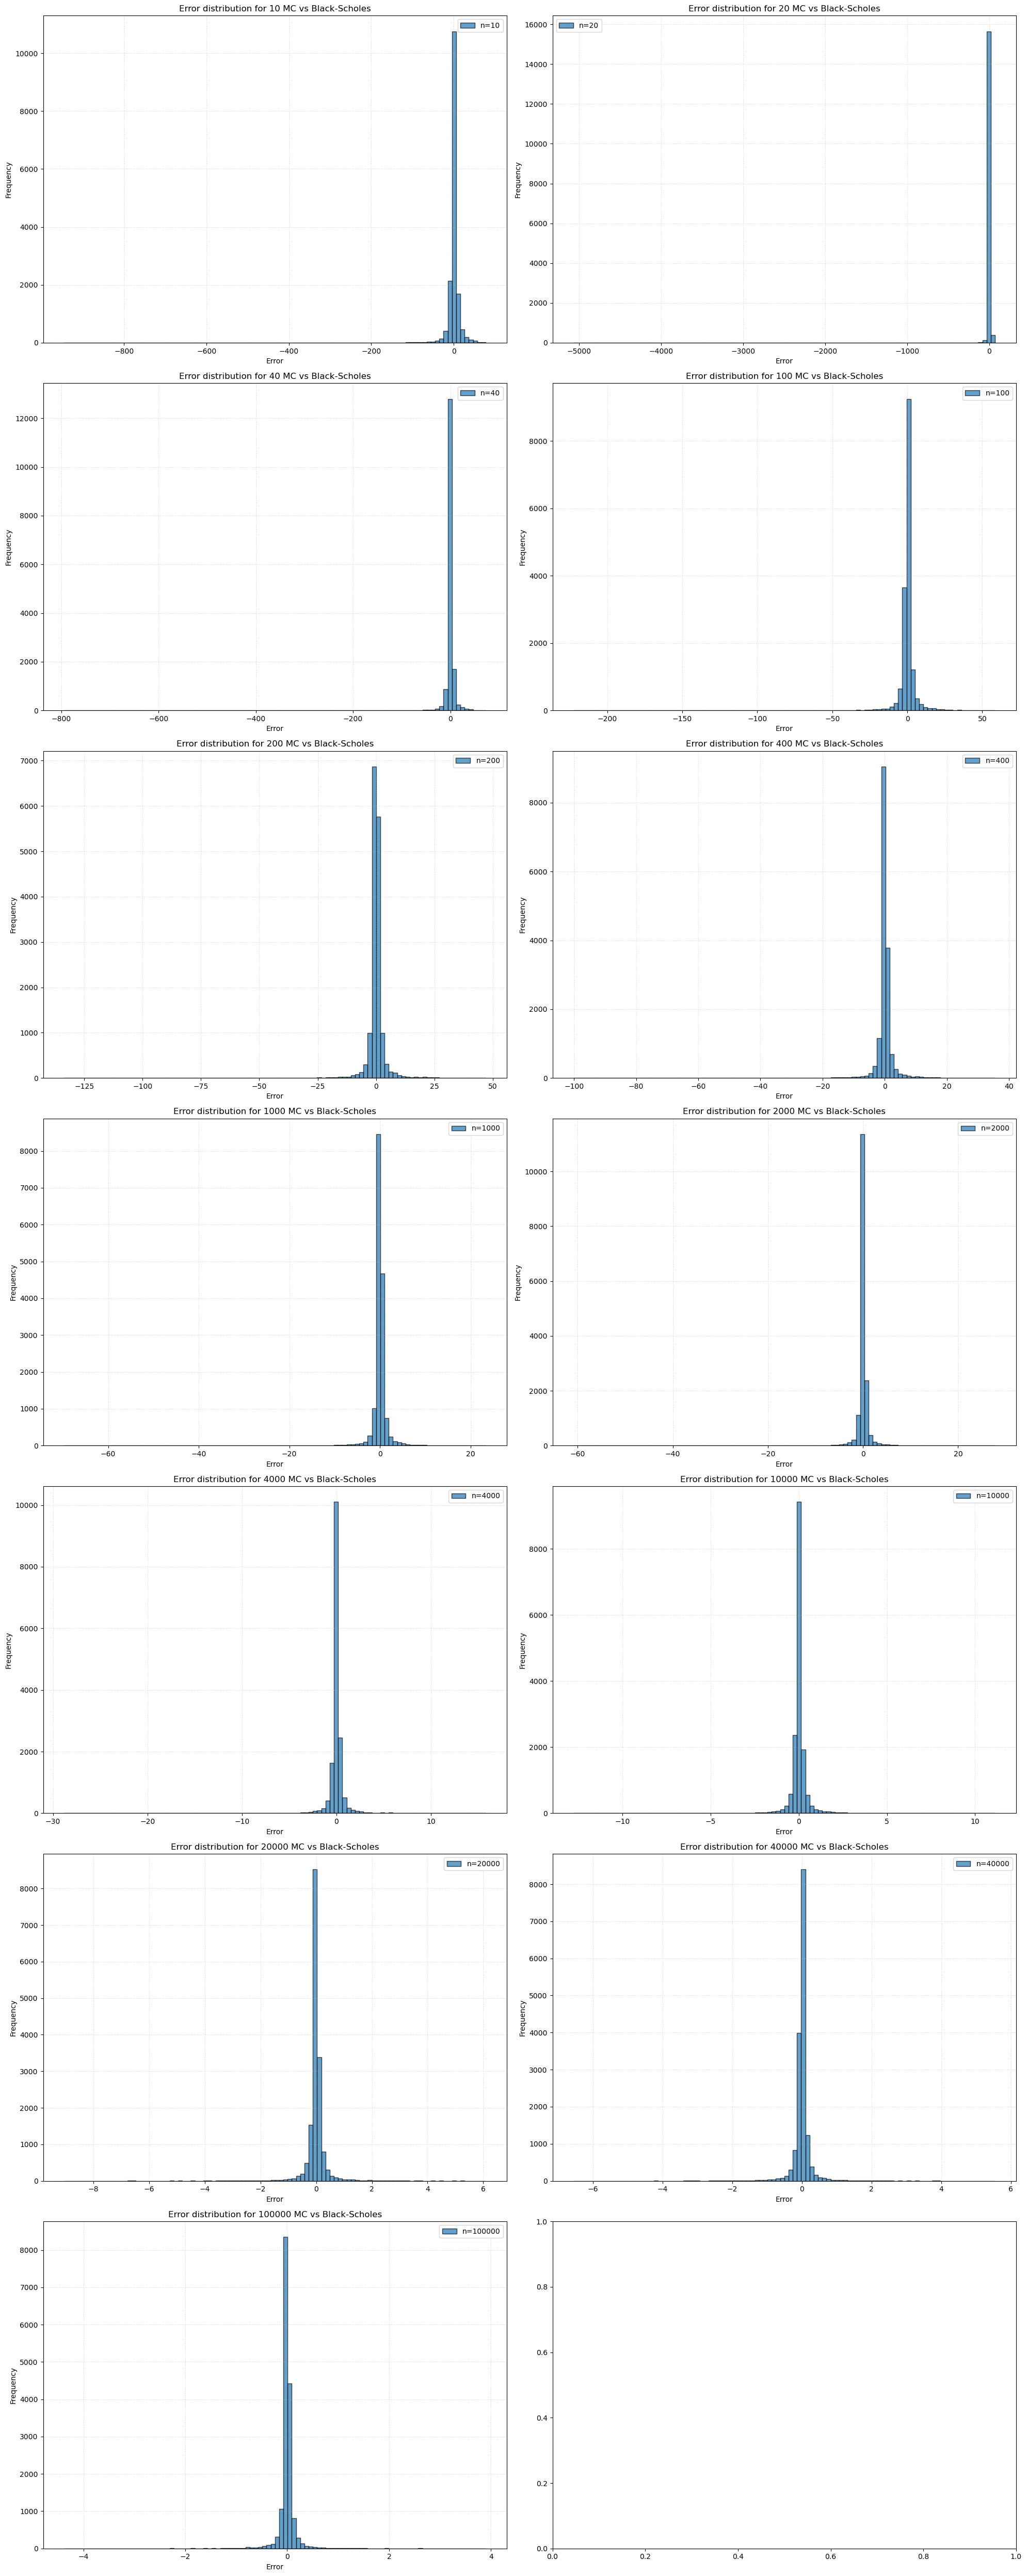

In [15]:
fig, axes = plt.subplots(7, 2, figsize=(20, 50))
axes = axes.flatten()

for ax, n_path in zip(axes, n_paths):
    counts, bins, patches = ax.hist(
        Error_Values[n_path],
        bins=100, 
        edgecolor="black", 
        alpha=0.7, 
        label=f"n={n_path}",
    )

    ax.set_title(f"Error distribution for {n_path} MC vs Black‑Scholes")
    ax.set_xlabel("Error")
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle=":", alpha=0.5)
    ax.legend()

plt.tight_layout()
plt.show()